In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##The module of the schemes
##For we have already define P as 2 in case A, so the formula I wrote below didn't show the parameter P but a certain number 2.

In [3]:
#a small test of Newton iterative method
A=3
B=4
X=0
d=2
Y=A*X**3+X-B

while (d>=0.00000000001):
    Yd=3*A*X**2+1
    X=-Y/Yd+X
    Y=A*X**3+X-B
    d=Y-0
print(X)
    

1.0


In [4]:
def iterativeB(X,P,A,B): #the iterative method only suitable in form A*X**P+X-B=0, which X is the unknowner power, A,B,P are the coefficents.
    d=2
    Y=A*X**P+X-B

    while (d>=0.000000000000001):
        Yd=P*A*X**(P-1)+1
        X=-Y/Yd+X
        Y=A*X**P+X-B
        d=np.abs(Y-0)
    return X

In [5]:
iterativeB(0,3,5,10)

1.2070400939272903

In [127]:
#Backward implicit(scheme.a)
#We know the solution of the X(n+1) is like A*X**3+X=B, which A=K*dt, B=S*dt+X(n) which can be represent as constant in certain n,
def SchemeB(X0,n,P,dt,K):
    
    X=[]
    t=[0]
    X0=0
    X.append(X0)
    Amplification=[0]
    
    for i in range(0,n):
        S=1+np.sin(2*np.pi*(i+1)/20*dt)# I think something unclearly explained with the Formula of S in the article,
                                    # only in this form can it output similar graph with different dt, on the articl wrote S=1+np.sin(2*np.pi*i/20)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        Xnp1=iterativeB(0,P+1,K*dt,S*dt+X[-1])
        X.append(Xnp1)
        t.append(dt*i)
        
        AmplificationFactor=np.abs((X[-1]-Xe)/(X[-2]-Xe))
        Amplification.append(AmplificationFactor)
    return X,t,Amplification

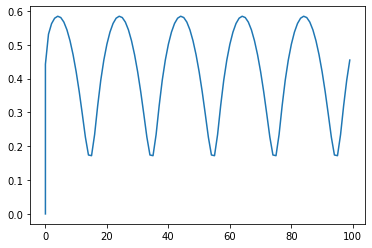

In [128]:
A=SchemeB(0,100,2,1,10)[0]
B=SchemeB(0,100,2,1,10)[1]
plt.plot(B,A)

In [125]:
#Crank-Nicholson, Scheme.c, there is a problem, if dt is little big, such as 1, the initial point will cause a tremble.

#We know the solution of the (X(n+1)+X(n))/2 is like A*X**3+X=B(the same as scheme.b),
#which A=K*dt/2, B=S*dt/2+X[n] which can be represented as constant in certain n.
def SchemeC(X0,n,P,dt,K):
    
    X=[]
    t=[0]
    X.append(X0)
    Amplification=[0]
    for i in range(0,n):
        S=1+np.sin(2*np.pi*(i+1)/20*dt)
        Xnp1=2*iterativeB(0,P+1,K*dt/2,S*dt/2+X[-1])-X[-1]#(X(n+1)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X.append(Xnp1)
        t.append(dt*i)
        AmplificationFactor=np.abs((X[-1]-Xe)/(X[-2]-Xe))
        Amplification.append(AmplificationFactor)
    return X,t,Amplification

A=SchemeB(0,100,1,10)[0]
B=SchemeB(0,100,1,10)[1]
plt.plot(B,A)

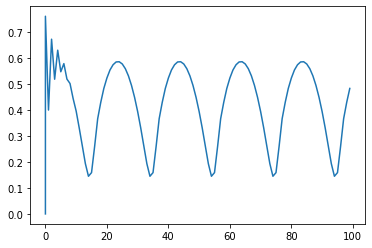

In [126]:
A=SchemeC(0,100,2,1,10)[0]
B=SchemeC(0,100,2,1,10)[1]
plt.plot(B,A)

In [129]:
#Explicit coefficent implicit temperature, Scheme.d

def SchemeD(X0,n,P,dt,K):
    X=[]
    t=[0]
    A=[]
    X.append(X0)
    Amplification=[0]
    for i in range(0,n):
        S=1+np.sin(2*np.pi*(i+1)/20*dt)
        Xnp1=(X[-1]+S*dt)/(1+K*X[-1]**P*dt)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X.append(Xnp1)
        t.append(dt*i)
        AmplificationFactor=np.abs((X[-1]-Xe)/(X[-2]-Xe))
        Amplification.append(AmplificationFactor)
    return X,t,Amplification

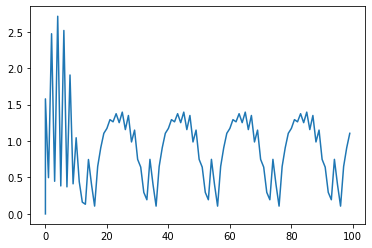

In [130]:
A=SchemeD(0,100,2,1,10)[2]
B=SchemeD(0,100,2,1,10)[1]
plt.plot(B,A)

In [131]:
#Predictor-corrector coefficient, implicit temperature, scheme.e
def SchemeE(X0,n,P,dt,K):
    X=[]
    t=[0]
    A=[]
    X.append(X0)
    Amplification=[0]
    for i in range(0,n):
        S=1+np.sin(2*np.pi*(i+1)/20*dt)
        Xstar=(X[-1]+S*dt)/(1+K*X[-1]**P*dt)#X*
        Xnp1=(X[-1]+S*dt)/(1+K*Xstar**P*dt)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X.append(Xnp1)
        t.append(dt*i)
        AmplificationFactor=np.abs((X[-1]-Xe)/(X[-2]-Xe))
        Amplification.append(AmplificationFactor)
    return X,t,Amplification

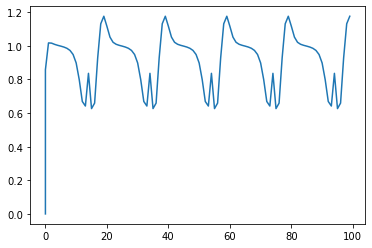

In [132]:
A=SchemeE(0,100,2,1,10)[2]
B=SchemeE(0,100,2,1,10)[1]
plt.plot(B,A)

In [133]:
#Averaged coefficient (t*,tn), implicit temperature,scheme.f
def SchemeF(X0,n,P,dt,K):
    X=[]
    t=[0]
    A=[]
    X.append(X0)
    Amplification=[0]
    for i in range(0,n):
        S=1+np.sin(2*np.pi*(i+1)/20*dt)
        Xstar=(X[-1]+S*dt)/(1+K*X[-1]**P*dt)#X*
        Xnp1=(X[-1]+S*dt)/(1+K*(X[-1]**P+Xstar**P)/2*dt)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X.append(Xnp1)
        t.append(dt*i)
        AmplificationFactor=np.abs((X[-1]-Xe)/(X[-2]-Xe))
        Amplification.append(AmplificationFactor)
    return X,t,Amplification

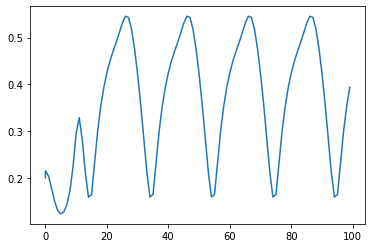

In [134]:
A=SchemeF(0.2,100,2,1,10)[0]
B=SchemeF(0.2,100,2,1,10)[1]
plt.plot(B,A)

In [135]:
#Explicit coefficient, extrapolated temperature, scheme.g

def SchemeG(X0,n,P,dt,K,gamma):
    X=[]
    t=[0]
    A=[]
    X.append(X0)
    Amplification=[0]
    for i in range(0,n):
        S=1+np.sin(2*np.pi*(i+1)/20*dt)
        Xnp1=(-K*X[-1]**3*(1-gamma)*dt+S*dt+X[-1])/(1+K*gamma*dt*X[-1]**P)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X.append(Xnp1)
        t.append(dt*i)
        AmplificationFactor=np.abs((X[-1]-Xe)/(X[-2]-Xe))
        Amplification.append(AmplificationFactor)
    return X,t,Amplification

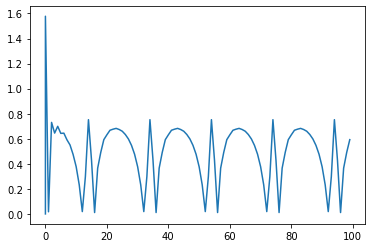

In [136]:
A=SchemeG(0,100,2,1,10,1.5)[2]
B=SchemeG(0,100,2,1,10,1.5)[1]
plt.plot(B,A)

In [137]:
#Explicit coefficient, implcit temperature,followed by time filter scheme.h

def SchemeH(X0,n,P,dt,K,A):
    X=[]
    t=[0]
    X.append(X0)
    Amplification=[0]
    for i in range(0,n):
        S=1+np.sin(2*np.pi*(i+1)/20*dt)
        Xstar=(X[-1]+S*dt)/(1+K*X[-1]**P*dt)#X*
        Xnp1=(1-A)*Xstar+A*X[-1]
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X.append(Xnp1)
        t.append(dt*i)
        AmplificationFactor=np.abs((X[-1]-Xe)/(X[-2]-Xe))
        Amplification.append(AmplificationFactor)
    return X,t,Amplification

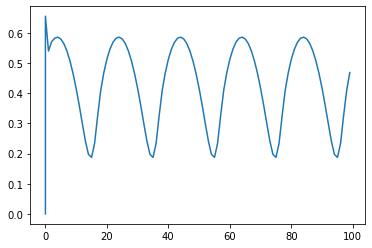

In [138]:
A=SchemeH(0,100,2,1,10,0.5)[0]
B=SchemeH(0,100,2,1,10,0.5)[1]
plt.plot(B,A)

In [139]:
#Double time step, explicit coefficient, implicit temperature, followed by time average, scheme.i
def SchemeI(X0,n,P,dt,K):
    X=[]
    t=[0]
    X.append(X0)
    Amplification=[0]
    for i in range(0,n):
        S=1+np.sin(2*np.pi*(i+1)/20*dt)
        Xstar=(X[-1]+2*S*dt)/(1+2*K*X[-1]**P*dt)#X*
        Xnp1=(Xstar+X[-1])/2
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X.append(Xnp1)
        t.append(dt*i)
        AmplificationFactor=np.abs((X[-1]-Xe)/(X[-2]-Xe))
        Amplification.append(AmplificationFactor)
    return X,t,Amplification

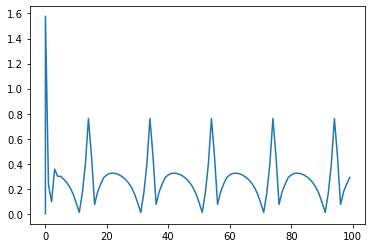

In [140]:
A=SchemeI(0,100,2,1,10)[2]
B=SchemeI(0,100,2,1,10)[1]
plt.plot(B,A)

In [141]:
#Scheme.h but with the time filter applied only when the exchange coefficient is large
def SchemeHplus(X0,n,P,dt,K,A):
    X=[]
    t=[0]
    X.append(X0)
    Amplification=[0]
    for i in range(0,n):
        S=1+np.sin(2*np.pi*(i+1)/20*dt)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        Xnp1=(X[-1]+S*dt)/(1+K*X[-1]**P*dt)#same as scheme d
        if np.abs((Xnp1-Xe)/(X[-1]-Xe))<1: #test if the the amplification factor is equal or larger than 1, applying time filter
            X.append(Xnp1)
        else:       #same as scheme.h
            Xstar=(X[-1]+S*dt)/(1+K*X[-1]**P*dt)#X*
            Xnp1=(1-A)*Xstar+A*X[-1]
            X.append(Xnp1)
        t.append(dt*i)
        AmplificationFactor=np.abs((X[-1]-Xe)/(X[-2]-Xe))
        Amplification.append(AmplificationFactor)
    return X,t,Amplification

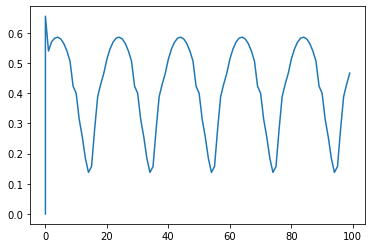

In [142]:
A=SchemeHplus(0,100,2,1,10,0.5)[0]
B=SchemeHplus(0,100,2,1,10,0.5)[1]
plt.plot(B,A)

In [147]:
#The scheme not mention in the section 2 but show on the thrid panel of the middle row.
def SchemeX(X0,n,P,dt,K):
    X=[]
    t=[0,dt]
    X.append(X0)
    
    X.append(SchemeHplus(X0,n,P,dt,K,0.5)[0][1])#for it is the three-time level scheme, X[1]will use other two-level scheme to calculate
    S=1+np.sin(2*np.pi*0/20*dt)
    Xe=(S/K)**(1/(P+1))#equilibrium solution
    Amplification=[0,np.abs((X[-1]-Xe)/(X[-2]-Xe))]
    for i in range(1,n):
        S=1+np.sin(2*np.pi*(i+1)/20*dt)
        Xnp1=(X[-1]+S*dt)/(1+K*(X[-1]**P+X[-2]**P)/2*dt)
        Xe=(S/K)**(1/(P+1))#equilibrium solution
        X.append(Xnp1)
        t.append(dt*i)
        AmplificationFactor=np.abs((X[-1]-Xe)/(X[-2]-Xe))
        Amplification.append(AmplificationFactor)
    return X,t,Amplification

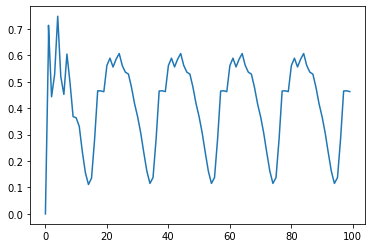

In [148]:
A=SchemeX(0,100,2,1,10)[0]
B=SchemeX(0,100,2,1,10)[1]
plt.plot(B,A)

Text(0.5, 1.0, 'Δt;AVERAGED WHEN OSCILLATORY')

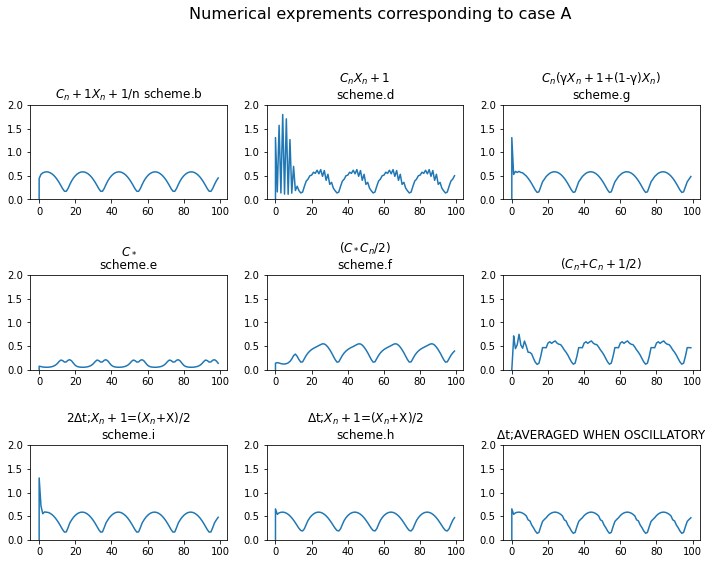

In [149]:
fig=plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.8)
fig.suptitle('Numerical exprements corresponding to case A',fontsize=16,x=0.53,y=1.05,)
schemeB=fig.add_subplot(331)
schemeX=fig.add_subplot(336)
schemeD=fig.add_subplot(332)
schemeE=fig.add_subplot(334)
schemeF=fig.add_subplot(335)
schemeG=fig.add_subplot(333)
schemeH=fig.add_subplot(338)
schemeI=fig.add_subplot(337)
schemeHplus=fig.add_subplot(339)

i=0# 1=0, will plot 

schemeB.plot(SchemeB(0,100,2,1,10)[1],SchemeB(0,100,2,1,10)[i])
schemeB.set_ylim(0,2)
schemeB.set_title('${C_n+1}$${X_n+1}$\n scheme.b')

schemeX.plot(SchemeX(0,100,2,1,10)[1],SchemeX(0,100,2,1,10)[i])
schemeX.set_ylim(0,2)
schemeX.set_title('(${C_n}$+${C_n+1}$/2)')

schemeD.plot(SchemeD(0,100,2,1,10)[1],SchemeD(0,100,2,1,10)[i])
schemeD.set_ylim(0,2)
schemeD.set_title('${C_n}$${X_n+1}$\nscheme.d')

schemeE.plot(SchemeE(0,100,2,1,10)[1],SchemeE(0,100,2,1,10)[i])
schemeE.set_ylim(0,2)
schemeE.set_title('${C_*}$\nscheme.e')

schemeF.plot(SchemeF(0,100,2,1,10)[1],SchemeF(0,100,2,1,10)[i])
schemeF.set_ylim(0,2)
schemeF.set_title('(${C_*}$${C_n}$/2)\nscheme.f')

schemeG.plot(SchemeG(0,100,2,1,10,1.5)[1],SchemeG(0,100,2,1,10,1.5)[i])
schemeG.set_ylim(0,2)
schemeG.set_title('${C_n}$(γ${X_n+1}$+(1-γ)${X_n}$)\nscheme.g')

schemeH.plot(SchemeH(0,100,2,1,10,0.5)[1],SchemeH(0,100,2,1,10,0.5)[i])
schemeH.set_ylim(0,2)
schemeH.set_title('Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.h')

schemeI.plot(SchemeI(0,100,2,1,10)[1],SchemeI(0,100,2,1,10)[i])
schemeI.set_ylim(0,2)
schemeI.set_title('2Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.i')

schemeHplus.plot(SchemeHplus(0,100,2,1,10,0.5)[1],SchemeHplus(0,100,2,1,10,0.5)[i])
schemeHplus.set_ylim(0,2)
schemeHplus.set_title('Δt;AVERAGED WHEN OSCILLATORY')


Text(0.5, 1.0, 'Δt;AVERAGED WHEN OSCILLATORY')

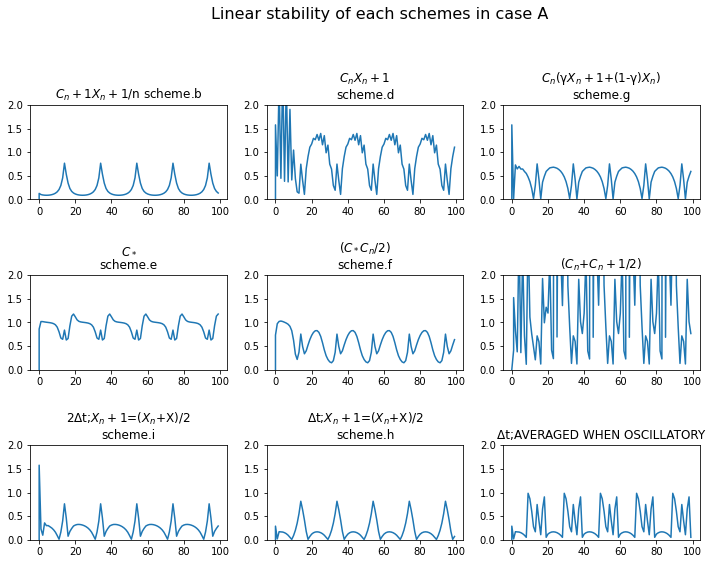

In [150]:
fig=plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.8)
fig.suptitle('Linear stability of each schemes in case A',fontsize=16,x=0.53,y=1.05,)
schemeB=fig.add_subplot(331)
schemeC=fig.add_subplot(336)
schemeD=fig.add_subplot(332)
schemeE=fig.add_subplot(334)
schemeF=fig.add_subplot(335)
schemeG=fig.add_subplot(333)
schemeH=fig.add_subplot(338)
schemeI=fig.add_subplot(337)
schemeHplus=fig.add_subplot(339)

i=2

schemeB.plot(SchemeB(0,100,2,1,10)[1],SchemeB(0,100,2,1,10)[i])
schemeB.set_ylim(0,2)
schemeB.set_title('${C_n+1}$${X_n+1}$\n scheme.b')

schemeC.plot(SchemeX(0,100,2,1,10)[1],SchemeX(0,100,2,1,10)[i])
schemeC.set_ylim(0,2)
schemeC.set_title('(${C_n}$+${C_n+1}$/2)')

schemeD.plot(SchemeD(0,100,2,1,10)[1],SchemeD(0,100,2,1,10)[i])
schemeD.set_ylim(0,2)
schemeD.set_title('${C_n}$${X_n+1}$\nscheme.d')

schemeE.plot(SchemeE(0,100,2,1,10)[1],SchemeE(0,100,2,1,10)[i])
schemeE.set_ylim(0,2)
schemeE.set_title('${C_*}$\nscheme.e')

schemeF.plot(SchemeF(0,100,2,1,10)[1],SchemeF(0,100,2,1,10)[i])
schemeF.set_ylim(0,2)
schemeF.set_title('(${C_*}$${C_n}$/2)\nscheme.f')

schemeG.plot(SchemeG(0,100,2,1,10,1.5)[1],SchemeG(0,100,2,1,10,1.5)[i])
schemeG.set_ylim(0,2)
schemeG.set_title('${C_n}$(γ${X_n+1}$+(1-γ)${X_n}$)\nscheme.g')

schemeH.plot(SchemeH(0,100,2,1,10,0.5)[1],SchemeH(0,100,2,1,10,0.5)[i])
schemeH.set_ylim(0,2)
schemeH.set_title('Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.h')

schemeI.plot(SchemeI(0,100,2,1,10)[1],SchemeI(0,100,2,1,10)[i])
schemeI.set_ylim(0,2)
schemeI.set_title('2Δt;${X_n+1}$=(${X_n}$+X)/2\nscheme.i')

schemeHplus.plot(SchemeHplus(0,100,2,1,10,0.5)[1],SchemeHplus(0,100,2,1,10,0.5)[i])
schemeHplus.set_ylim(0,2)
schemeHplus.set_title('Δt;AVERAGED WHEN OSCILLATORY')